2025-05-21 12:11:46.579295: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-21 12:11:46.874623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747829506.992233   14451 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747829507.024078   14451 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747829507.281022   14451 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Cargando dataset 'Maysee/tiny-imagenet'...
Dataset cargado.
DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 100000
    })
    valid: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

Mostrando imagen de ejemplo (índice 2300 del conjunto 'train'):


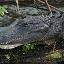

In [ ]:
# Importaciones necesarias
from datasets import load_dataset
from transformers import pipeline
import ray
import time 
# Carga del dataset
print("Cargando dataset 'Maysee/tiny-imagenet'...")
tiny_imagenet = load_dataset('Maysee/tiny-imagenet')
print("Dataset cargado.")
print(tiny_imagenet)

# Accedermosa una imagen de ejemplo
img_example = tiny_imagenet['train'][2002]['image']
print("\nMostrando imagen de ejemplo (índice 2002 del conjunto 'train'):")
img_example # En Jupyter, esto mostrará la imagen

In [ ]:
# Cargamos el modelo de clasificación de imágenes
print("Cargando el clasificador de imágenes 'image-classification'...")
clf = pipeline("image-classification", framework="pt") # "pt" es para PyTorch
print("Clasificador cargado.")

print("\nClasificando la imagen de ejemplo:")
classification_result = clf(img_example)
print(classification_result)

# Función auxiliar para obtener la mejor clase y puntuación
def get_best_class_and_score(classifier, pil_image):
    """
    Clasifica una imagen y retorna la tupla (clase, puntuación) de la mejor predicción.
    """
    predictions = classifier(pil_image)
    if predictions: # Asegurarse de que hay predicciones
        best_prediction = predictions[0] # La primera es la de mayor puntuación
        return (best_prediction['label'], best_prediction['score'])
    return (None, 0.0) # En caso de no haber predicciones

# Probamos la función auxiliar
best_class, best_score = get_best_class_and_score(clf, img_example)
print(f"\nMejor clasificación para la imagen de ejemplo: Clase='{best_class}', Puntuación={best_score:.4f}")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Cargando el clasificador de imágenes 'image-classification'...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


Clasificador cargado.

Clasificando la imagen de ejemplo:
[{'label': 'American alligator, Alligator mississipiensis', 'score': 0.9436621069908142}, {'label': 'African crocodile, Nile crocodile, Crocodylus niloticus', 'score': 0.025410493835806847}, {'label': 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus', 'score': 0.001243826700374484}, {'label': 'alligator lizard', 'score': 0.0007204443099908531}, {'label': 'frilled lizard, Chlamydosaurus kingi', 'score': 0.0007057989132590592}]

Mejor clasificación para la imagen de ejemplo: Clase='American alligator, Alligator mississipiensis', Puntuación=0.9437
